**Item Demand Forecasting**

In [ ]:
# fit an ARIMA model and plot residual errors
import pandas as pd
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')
# load dataset
series = read_csv('train 2.csv',  header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
series.head()

,store,item,sales
date,,,
2013-01,1,1,13
2013-01,1,1,11
2013-01,1,1,14
2013-01,1,1,13
2013-01,1,1,10


In [ ]:
series = series.sort_index()
series = series['sales']
series = series.groupby(pd.Grouper(freq="M"))
series = series.sum()
series_main=series.copy()
series = series.head(48)
print('training and testing dataset \n\n',series)
validation = series_main.tail(12)
print('\n\nvalidation dataset \n\n',validation)

training and testing dataset 

 date
2013-01     454904
2013-02     459417
2013-03     617382
2013-04     682274
2013-05     763242
2013-06     795597
2013-07     855922
2013-08     766761
2013-09     689907
2013-10     656587
2013-11     692643
2013-12     506607
2014-01     525987
2014-02     529117
2014-03     704301
2014-04     788914
2014-05     882877
2014-06     906842
2014-07     989010
2014-08     885596
2014-09     785124
2014-10     758883
2014-11     800783
2014-12     578048
2015-01     552513
2015-02     551317
2015-03     730951
2015-04     824467
2015-05     926902
2015-06     937184
2015-07    1037350
2015-08     920401
2015-09     823332
2015-10     797253
2015-11     827645
2015-12     607572
2016-01     602439
2016-02     614957
2016-03     790881
2016-04     901950
2016-05     988730
2016-06    1022664
2016-07    1138718
2016-08     981494
2016-09     896831
2016-10     863637
2016-11     891448
2016-12     663411
Freq: M, Name: sales, dtype: int64


validation dat

# Fitting the ARIMA Model on Training Set

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   47
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -595.041
Method:                       css-mle   S.D. of innovations          73734.705
Date:                Sun, 02 Jan 2022   AIC                           1204.081
Time:                        15:53:27   BIC                           1217.032
Sample:                    02-28-2013   HQIC                          1208.955
                         - 12-31-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4436.3191   9388.135      0.473      0.639    -1.4e+04    2.28e+04
ar.L1.D.sales     0.3288      0.114      2.873      0.006       0.104       0.553
ar.L2.D.sales    -0.0392      0.113     

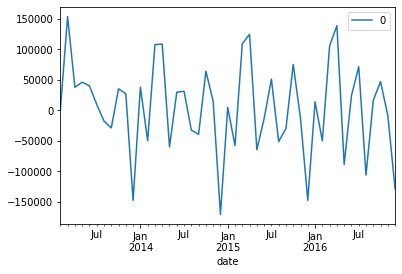

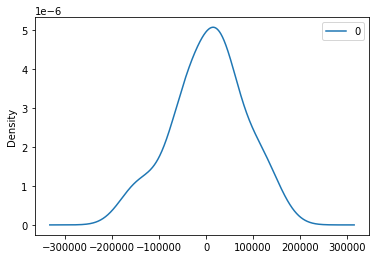

                   0
count      47.000000
mean     4467.865250
std     76349.427328
min   -170846.846537
25%    -44858.954969
50%     13661.954220
75%     46457.929321
max    153515.903049


In [ ]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
#lets make prediction
X = series.copy()
size = int(len(X) * 0.70)
print(size)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

33


# Prediction on Testing Set

In [ ]:
from numpy import sqrt 

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=713354.962971, expected=797253.000000
predicted=851644.944943, expected=827645.000000
predicted=775665.181745, expected=607572.000000
predicted=582258.169834, expected=602439.000000
predicted=667661.903734, expected=614957.000000
predicted=682165.423520, expected=790881.000000
predicted=764718.162729, expected=901950.000000
predicted=1085408.569429, expected=988730.000000
predicted=991538.676294, expected=1022664.000000
predicted=1058945.657653, expected=1138718.000000
predicted=1105695.771476, expected=981494.000000
predicted=881235.355638, expected=896831.000000
predicted=809702.494309, expected=863637.000000
predicted=905464.369895, expected=891448.000000
predicted=812515.419255, expected=663411.000000


In [ ]:
from sklearn.metrics import mean_squared_error
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))

print('Test RMSE: %.3f' % rmse)

Test RMSE: 92156.715


In [ ]:
test=test.reset_index()
test['predictions']=predictions
test=test[['date','sales','predictions']]
test

,date,sales,predictions
0,2015-10,797253,[713354.9629708354]
1,2015-11,827645,[851644.9449430258]
2,2015-12,607572,[775665.1817449776]
3,2016-01,602439,[582258.1698341373]
4,2016-02,614957,[667661.9037335255]
5,2016-03,790881,[682165.423519529]
6,2016-04,901950,[764718.1627287078]
7,2016-05,988730,[1085408.569428657]
8,2016-06,1022664,[991538.6762936307]
9,2016-07,1138718,[1058945.6576531224]


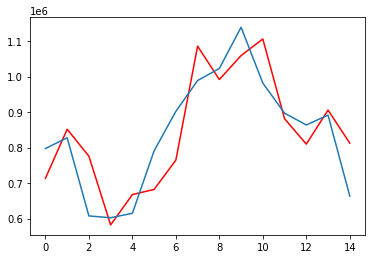

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(predictions, color='red')
pyplot.plot(test['sales'])
pyplot.show()

# Final Predction on Validation Set

In [ ]:
# walk-forward validation
for t in range(len(validation)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = validation[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=673638.760318, expected=617306.000000
predicted=654139.467260, expected=621369.000000
predicted=695776.230425, expected=822667.000000
predicted=816799.580173, expected=938862.000000
predicted=1112335.854995, expected=1020686.000000
predicted=1032216.216253, expected=1064624.000000
predicted=1118630.693782, expected=1171393.000000
predicted=1117427.332133, expected=1026403.000000
predicted=913817.749455, expected=935263.000000
predicted=854317.491488, expected=891160.000000
predicted=927424.689720, expected=928837.000000
predicted=861277.143736, expected=695170.000000
